<a href="https://colab.research.google.com/github/simodepth96/Data-Science-Portfolio/blob/main/Airline_EDA_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#EDA of airline prices
Exploration to find the best deal for a fictional client base and help them understand how airline prices change




In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

## Read in Data
flight = pd.read_csv("flight.csv")
flight.head()

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2


In [83]:
#@title data pre-processing
flight.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129780 entries, 0 to 129779
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   miles                   129780 non-null  int64  
 1   passengers              129780 non-null  int64  
 2   delay                   129780 non-null  int64  
 3   inflight_meal           129780 non-null  object 
 4   inflight_entertainment  129780 non-null  object 
 5   inflight_wifi           129780 non-null  object 
 6   day_of_week             129780 non-null  object 
 7   redeye                  129780 non-null  object 
 8   weekend                 129780 non-null  object 
 9   coach_price             129780 non-null  float64
 10  firstclass_price        129780 non-null  float64
 11  hours                   129780 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 11.9+ MB


In [88]:
#data types
flight['coach_price'] = flight['coach_price'].astype(int).round(2)
flight['firstclass_price'] = flight['firstclass_price'].astype(int).round(2)

In [89]:
#rename columns
flight.rename(columns={'coach_price': 'coach price', 'firstclass_price': 'firstclass price', 'inflight_meal': 'inflight meal',	'inflight_entertainment': 'inflight entertainment', 'inflight_wifi': 'inflight wifi', 'day_of_week':'day of week'}, inplace=True)
flight.head()

,miles,passengers,delay,inflight meal,inflight entertainment,inflight wifi,day of week,redeye,weekend,coach price,firstclass price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338,1571,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472,1663,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351,1429,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387,1558,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374,1245,2


## Univariate Analysis

What do coach ticket prices look like? What are the high and low values? What would be considered the average? Does $500 seem like a good price for a coach ticket?

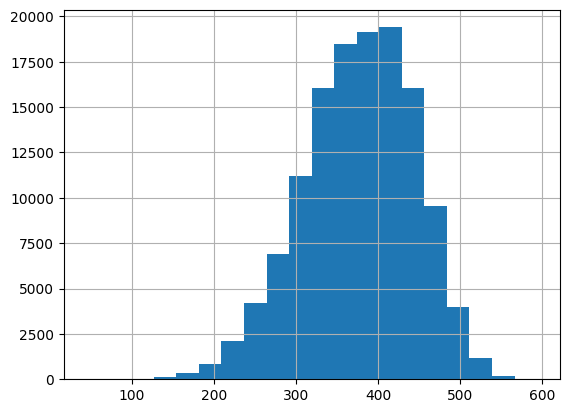

<Figure size 640x480 with 0 Axes>

In [8]:
ticket_prices = flight.coach_price.hist(bins=20)
plt.show() # Show the plot
plt.clf() # Clear the plot

In [90]:
# Ensure coach_price is numeric
flight['coach price'] = flight['coach price'].astype('float64')

# Filter for 8-hour-long flights
eight_hour_flights = flight[flight['hours'] == 8]

# Calculate max, min, and mean prices for 8-hour flights
max_price = eight_hour_flights['coach price'].max()
min_price = eight_hour_flights['coach price'].min()
avg_price = eight_hour_flights['coach price'].mean()

# Print results
print(f'The maximum price is ${max_price:.2f}')
print(f'The minimum price is ${min_price:.2f}')
print(f'The average price for 8-hour flights is ${avg_price:.2f}')


The maximum price is $593.00
The minimum price is $170.00
The average price for 8-hour flights is $431.33


In [34]:
## Task 2: How are flight delay times distributed?
#Let's say there is a short amount of time between two connecting flights, and a flight delay would put the client at risk of missing their connecting flight.
# What kinds of delays are typical?

flight['delay'].value_counts()
print(f'the most typical delay is {flight["delay"].mode()[0]}')


the most typical delay is 10


## Bivariate Analysis

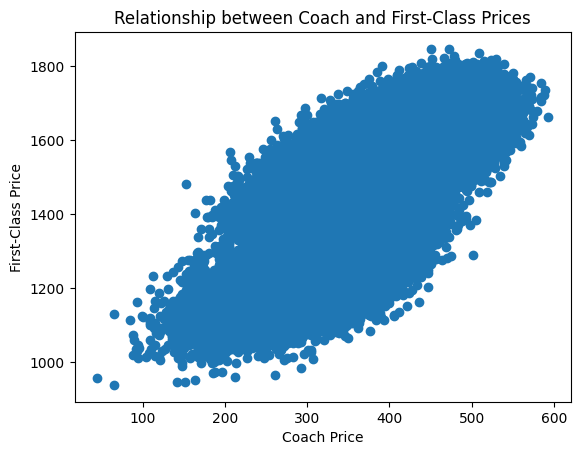

flights with higher coach prices seem to related to higher first-class prices


In [91]:
## Task 3: Create a visualization that shows the relationship between coach and first-class prices
#Do flights with higher coach prices always have higher first-class prices as well?

flight['coach price'] = flight['coach price'].astype(int).round(2)
flight['firstclass price'] = flight['firstclass price'].astype(int).round(2)

plt.scatter(flight['coach price'], flight['firstclass price'])
plt.xlabel('Coach Price')
plt.ylabel('First-Class Price')
plt.title('Relationship between Coach and First-Class Prices')
plt.show()

print(f'flights with higher coach prices seem to related to higher first-class prices')

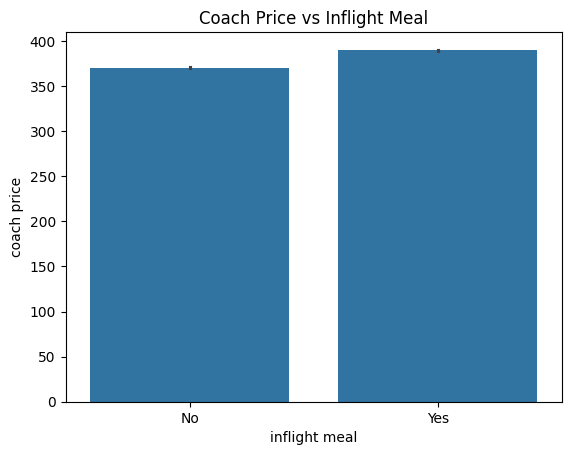

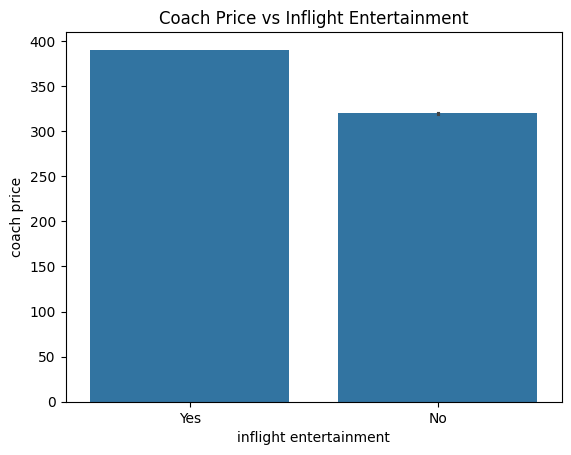

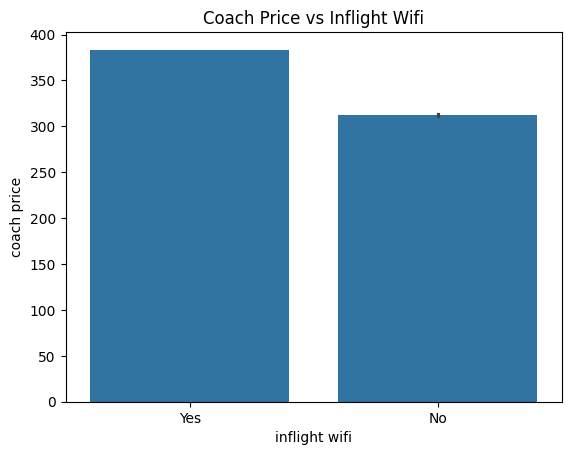

In [92]:
## Task 4
#What is the relationship between coach prices and inflight features, inflight meal, inflight entertainment, and inflight WiFi?
#Which features are associated with the highest increase in price?
sns.barplot(x='inflight meal', y='coach price', data=flight)
plt.title('Coach Price vs Inflight Meal') # Set title using plt.title
plt.show()
sns.barplot(x='inflight entertainment', y='coach price', data=flight)
plt.title('Coach Price vs Inflight Entertainment') # Set title using plt.title
plt.show()
sns.barplot(x='inflight wifi', y='coach price', data=flight)
plt.title('Coach Price vs Inflight Wifi') # Set title using plt.title
plt.show()

In [44]:
print(f'inflight_entertainment and inflight_wifi has the highest increase in price')

inflight_entertainment and inflight_wifi has the highest increase in price


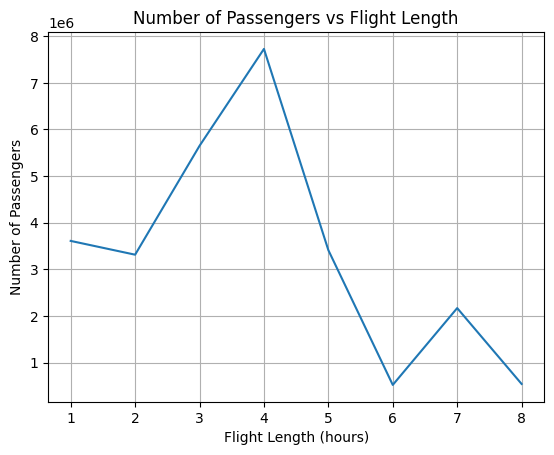

the number of passengers increases as the flight length hits up 4 hours before swiftly descending


In [57]:
## Task 5 How does the number of passengers change in relation to the length of flights?
import seaborn as sns

avg_passengers = flight.groupby('hours')['passengers'].sum().reset_index()

sns.lineplot(x='hours', y='passengers', data=avg_passengers)
plt.xlabel('Flight Length (hours)')
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers vs Flight Length')
plt.grid(True)
plt.show()
print(f'the number of passengers increases as the flight length hits up 4 hours before swiftly descending')



##Multivariate Analysis

In [93]:
print(flight.columns)

Index(['miles', 'passengers', 'delay', 'inflight meal',
       'inflight entertainment', 'inflight wifi', 'day of week', 'redeye',
       'weekend', 'coach price', 'firstclass price', 'hours'],
      dtype='object')


In [94]:


flight[['weekend','day of week']].head()

,weekend,day of week
0,Yes,Sunday
1,Yes,Sunday
2,Yes,Friday
3,Yes,Saturday
4,No,Monday


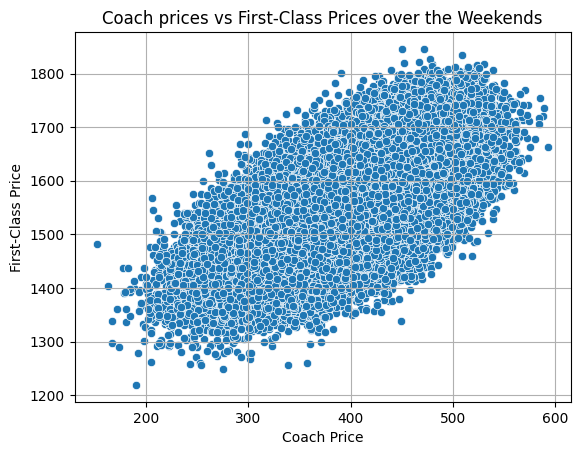

In [95]:
## task 6 Visualize the relationship between coach and first-class prices on weekends compared to weekdays
weekends = flight[flight['weekend'] == 'Yes']
sns.scatterplot(data=weekends, x='coach price', y='firstclass price')
plt.xlabel('Coach Price')
plt.ylabel('First-Class Price')
plt.title('Coach prices vs First-Class Prices over the Weekends')
plt.grid(True)
plt.show()



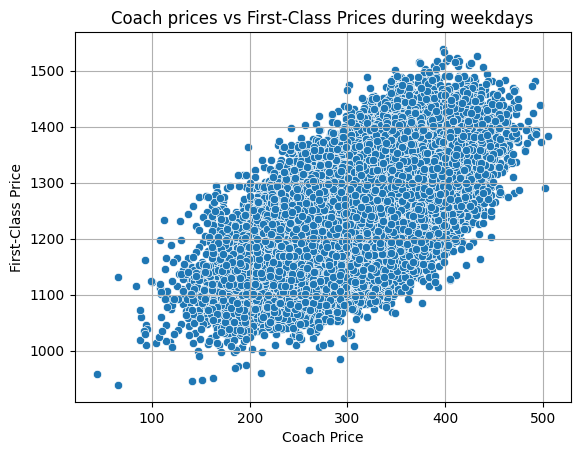

In [69]:
weekdays = flight[flight['weekend'] == 'No']
sns.scatterplot(data=weekdays, x='coach price', y='firstclass price')
plt.xlabel('Coach Price')
plt.ylabel('First-Class Price')
plt.title('Coach prices vs First-Class Prices during weekdays')
plt.grid(True)
plt.show()

Average Coach Price for Redeyes: $314.02


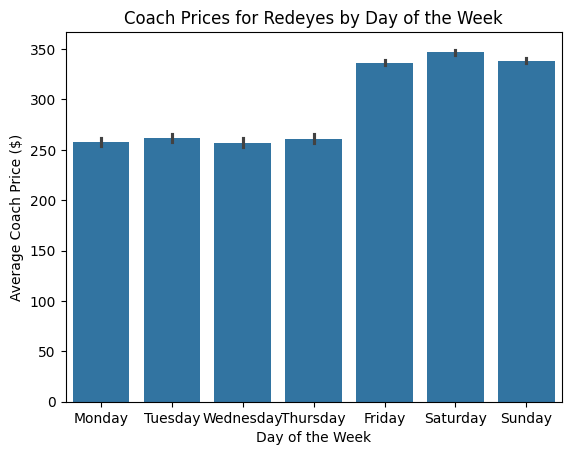

<Figure size 640x480 with 0 Axes>

In [96]:
## Task 7 How do coach prices differ for redeyes on each day of the week?
# Filter data for redeyes
is_redeye = flight[flight['redeye'] == 'Yes']

# Calculate and print the average coach price for redeyes
average_price = is_redeye['coach price'].mean()
print(f'Average Coach Price for Redeyes: ${average_price:.2f}')

# Ensure days are ordered properly
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create the barplot
sns.barplot(x='day of week', y='coach price', data=is_redeye, order=day_order)

# Add labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Average Coach Price ($)')
plt.title('Coach Prices for Redeyes by Day of the Week')

# Display and clear the plot
plt.show()
plt.clf()


Average Coach Price for Non-Redeyes: $379.33


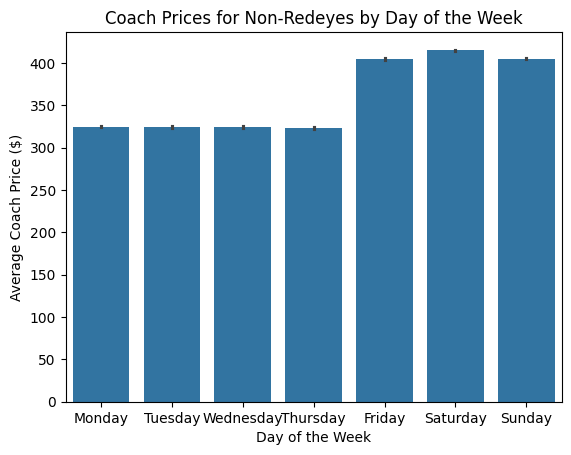

<Figure size 640x480 with 0 Axes>

In [97]:
## Task 7 How do coach prices differ for non-redeyes on each day of the week?
# Filter data for non-redeyes
is_nnn_redeye = flight[flight['redeye'] == 'No']

# Calculate and print the average coach price for redeyes
average_price = is_nnn_redeye['coach price'].mean()
print(f'Average Coach Price for Non-Redeyes: ${average_price:.2f}')

# Ensure days are ordered properly
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Create the barplot
sns.barplot(x='day of week', y='coach price', data=is_nnn_redeye, order=day_order)

# Add labels and title
plt.xlabel('Day of the Week')
plt.ylabel('Average Coach Price ($)')
plt.title('Coach Prices for Non-Redeyes by Day of the Week')

# Display and clear the plot
plt.show()
plt.clf()


In [81]:
print(f'the average coach price for Non redeyes is higher than redeyes for all days of the week \n In both cases costs pile up on weekends')

the average coach price for Non redeyes is higher than redeyes for all days of the week 
 In both cases costs pile up on weekends
